In [ ]:
# This is for figuring out a criterion for deciding whether a Fizeau PSF is of sufficient 
# quality to put it into a PCA cube. The residuals are actually the mean, median, and sum of 
# the absolute value of the residuals between a best-fit 2D Gaussian and the PSF

# Created 2019 Aug 21 by E.S.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt

In [19]:
df = pd.read_csv("residual_info_backup_20190822.csv")

# define subsets corresponding to different cubes
df_A = df.where(np.logical_or(np.logical_and(df["frame_num"] > 4258, df["frame_num"] < 5609), 
                              np.logical_and(df["frame_num"] > 5825, df["frame_num"] < 6302))).dropna().reset_index()
df_B = df.where(np.logical_and(df["frame_num"] > 6302, df["frame_num"] < 6922)).dropna().reset_index()
df_C = df.where(np.logical_and(df["frame_num"] > 7119, df["frame_num"] < 7735)).dropna().reset_index()
df_D = df.where(np.logical_or(np.logical_and(df["frame_num"] > 7926, df["frame_num"] < 10723), 
                              np.logical_and(df["frame_num"] > 10741, df["frame_num"] < 11409))).dropna().reset_index()

In [20]:
print(np.sort(df_A["frame_num"]))
print(np.sort(df_B["frame_num"]))
print(np.sort(df_C["frame_num"]))
print(np.sort(df_D["frame_num"]))

[4259. 4260. 4261. ... 6299. 6300. 6301.]
[6303. 6304. 6305. 6306. 6307. 6308. 6309. 6310. 6311. 6312. 6313. 6314.
 6315. 6316. 6317. 6318. 6319. 6320. 6321. 6322. 6323. 6324. 6325. 6326.
 6327. 6328. 6329. 6330. 6331. 6332. 6333. 6334. 6335. 6336. 6337. 6338.
 6339. 6340. 6341. 6342. 6343. 6344. 6345. 6346. 6347. 6348. 6349. 6350.
 6351. 6352. 6353. 6354. 6355. 6356. 6357. 6358. 6359. 6360. 6361. 6362.
 6363. 6364. 6365. 6366. 6367. 6368. 6369. 6370. 6371. 6372. 6373. 6374.
 6375. 6376. 6377. 6378. 6379. 6380. 6381. 6382. 6383. 6384. 6385. 6386.
 6387. 6388. 6389. 6390. 6391. 6392. 6393. 6394. 6395. 6396. 6397. 6398.
 6399. 6400. 6401. 6402. 6403. 6404. 6405. 6406. 6407. 6408. 6409. 6410.
 6411. 6412. 6413. 6414. 6415. 6416. 6417. 6418. 6419. 6420. 6421. 6422.
 6423. 6424. 6425. 6426. 6427. 6428. 6429. 6430. 6431. 6432. 6433. 6434.
 6435. 6436. 6437. 6438. 6439. 6440. 6441. 6442. 6443. 6444. 6445. 6446.
 6447. 6448. 6449. 6450. 6451. 6452. 6453. 6454. 6455. 6456. 6457. 6458.
 6459. 64

In [28]:
plt.clf()

plt.scatter(df["frame_num"], df["resd_avg"], s=1, label="resd_avg")
plt.scatter(df["frame_num"], df["resd_med"], s=1, label="resd_med")
plt.ylim([0,80])
plt.xlabel("Frame num")
plt.ylabel("resid")
plt.legend()
plt.show()

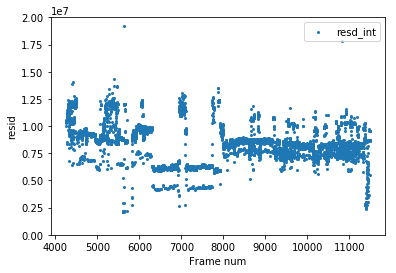

In [4]:
plt.clf()
plt.scatter(df["frame_num"], df["resd_int"], s=4, label="resd_int")
plt.ylim([0,0.2e8])
plt.xlabel("Frame num")
plt.ylabel("resid")
plt.legend()
plt.show()

In [29]:
plt.clf()
plt.scatter(df["frame_num"], df["x_gauss"], s=1, label="x_gauss")
plt.scatter(df["frame_num"], df["y_gauss"], s=1, label="y_gauss")
plt.ylim([0,15])
plt.xlabel("Frame num")
plt.ylabel("resid")
plt.legend()
plt.show()

In [16]:
plt.clf()
plt.scatter(df["x_gauss"], df["y_gauss"], s=1)
#plt.ylim([0,15])
plt.xlabel("x_gauss")
plt.ylabel("y_gauss")
plt.show()

In [14]:
plt.clf()
plt.scatter(df_sector1["x_gauss"], df_sector1["y_gauss"], s=1)
#plt.ylim([0,15])
plt.xlabel("x_gauss")
plt.ylabel("y_gauss")
plt.show()

In [13]:
df_sector1 = df.where(np.logical_and(np.logical_and(df["x_gauss"] > 4.2, df["x_gauss"] < 4.4),
                        np.logical_and(df["y_gauss"] > 4.4, df["y_gauss"] < 5.0))).dropna().reset_index()

In [15]:
df_sector1

,index,Unnamed: 0,frame_num,resd_avg,resd_int,resd_med,x_gauss,y_gauss
0,15,0.0,8859.0,46.684269,7.695248e+06,20.428734,4.303574,4.821355
1,17,0.0,5045.0,50.861822,8.383859e+06,30.382667,4.329421,4.919376
2,27,0.0,4544.0,55.711470,9.183256e+06,30.671553,4.314227,4.969551
3,40,0.0,10383.0,50.098767,8.258080e+06,19.875914,4.380929,4.419295
4,47,0.0,4997.0,52.164240,8.598545e+06,30.621844,4.305486,4.796247
5,52,0.0,4847.0,55.997852,9.230462e+06,31.091903,4.375041,4.431665
6,60,0.0,10431.0,50.097124,8.257809e+06,20.168842,4.310266,4.715781
7,64,0.0,9268.0,46.105817,7.599899e+06,20.485117,4.275177,4.849500
8,66,0.0,5519.0,53.945780,8.892207e+06,30.537581,4.364905,4.465936
9,72,0.0,4960.0,52.726205,8.691177e+06,30.561642,4.341418,4.630307


In [17]:
df_sector2 = df.where(np.logical_and(np.logical_and(df["x_gauss"] > 4.4, df["x_gauss"] < 5.0),
                        np.logical_and(df["y_gauss"] > 4.25, df["y_gauss"] < 4.5))).dropna().reset_index()

In [18]:
df_sector2

,index,Unnamed: 0,frame_num,resd_avg,resd_int,resd_med,x_gauss,y_gauss
0,2,0.0,8501.0,53.075922,8.748823e+06,20.660111,4.469132,4.383978
1,4,0.0,7095.0,56.546137,9.320839e+06,28.975236,4.846098,4.363349
2,5,0.0,9944.0,49.715911,8.194972e+06,20.077892,4.821054,4.305234
3,9,0.0,11156.0,50.271489,8.286551e+06,19.954237,4.841232,4.341184
4,10,0.0,5525.0,54.088150,8.915674e+06,30.773026,4.559855,4.338457
5,11,0.0,4551.0,56.529415,9.318083e+06,30.673568,4.561180,4.360369
6,13,0.0,9041.0,53.233339,8.774771e+06,20.444844,4.670449,4.348032
7,19,0.0,10875.0,50.821969,8.377290e+06,19.750166,4.726131,4.367242
8,20,0.0,8809.0,51.086150,8.420837e+06,20.530495,4.712818,4.252976
9,24,0.0,4832.0,56.355049,9.289341e+06,31.044539,4.487702,4.414719


In [19]:
df_sector3 = df.where(np.logical_and(np.logical_and(df["x_gauss"] > 4.0, df["x_gauss"] < 4.1),
                        np.logical_and(df["y_gauss"] > 4.15, df["y_gauss"] < 4.3))).dropna().reset_index()

In [20]:
df_sector3

,index,Unnamed: 0,frame_num,resd_avg,resd_int,resd_med,x_gauss,y_gauss
0,73,0.0,7607.0,38.209383,6.298282e+06,26.316664,4.051252,4.235348
1,75,0.0,11024.0,64.121507,1.056953e+07,22.485353,4.097453,4.230159
2,385,0.0,7605.0,38.230685,6.301793e+06,26.432673,4.078261,4.231691
3,409,0.0,7631.0,38.180310,6.293490e+06,26.441590,4.021654,4.216427
4,472,0.0,6824.0,38.584688,6.360146e+06,26.313627,4.020016,4.280654
5,513,0.0,7630.0,38.047416,6.271584e+06,26.239865,4.007887,4.175270
6,553,0.0,7573.0,38.345086,6.320651e+06,26.573534,4.081812,4.253063
7,594,0.0,7283.0,36.743169,6.056597e+06,26.555990,4.091888,4.178992
8,669,0.0,6499.0,36.026120,5.938402e+06,25.655832,4.056794,4.251526
9,729,0.0,7452.0,38.426188,6.334019e+06,26.645774,4.049559,4.157362


In [21]:
df_sector4 = df.where(np.logical_and(np.logical_and(df["x_gauss"] > 4.1, df["x_gauss"] < 4.2),
                        np.logical_and(df["y_gauss"] > 3.95, df["y_gauss"] < 4.05))).dropna().reset_index()

In [22]:
df_sector4

,index,Unnamed: 0,frame_num,resd_avg,resd_int,resd_med,x_gauss,y_gauss
0,16,0.0,11111.0,61.953714,1.021220e+07,19.969331,4.153755,4.035926
1,37,0.0,9209.0,65.325812,1.076805e+07,20.758571,4.138062,4.020045
2,44,0.0,9650.0,62.175770,1.024881e+07,20.478761,4.122889,3.994860
3,141,0.0,7624.0,37.883102,6.244499e+06,26.458238,4.191414,4.049587
4,274,0.0,7312.0,36.243049,5.974159e+06,25.964867,4.154210,3.982967
5,297,0.0,7305.0,36.558048,6.026082e+06,26.171526,4.105864,4.004990
6,327,0.0,10405.0,59.359709,9.784617e+06,20.515506,4.102642,4.014260
7,408,0.0,9646.0,62.279821,1.026596e+07,20.689545,4.114211,4.048506
8,467,0.0,9891.0,60.543850,9.979806e+06,20.427622,4.105064,4.011700
9,603,0.0,7314.0,36.292675,5.982339e+06,26.092515,4.169014,3.961471
